# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
statesEdu = pd.read_csv('../data/states_edu.csv')
statesEdu.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [4]:
statesEdu.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
# drop rows where response value, average 4th grade math score, is NaN
statesEdu.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Grade 4 Math

How many years of data are logged in our dataset? 

In [5]:
statesEdu["YEAR"].nunique()

13

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [43]:
# index statesEdu data frame by state
statesAverage = statesEdu.set_index('STATE')
# use .loc to select only Michigan and Ohio data, then group the filtered data by state
# and take the mean of the average math score for 4th grade
statesAverage.loc[['MICHIGAN', 'OHIO']].groupby('STATE')["AVG_MATH_4_SCORE"].mean()


STATE
MICHIGAN    234.363636
OHIO        239.454545
Name: AVG_MATH_4_SCORE, dtype: float64

Find the average for your outcome score across all states in 2019

In [44]:
# index statesEdu data frame by year
allStates2019 = statesEdu.set_index('YEAR')
# use .loc to select only 2019 data, then take the mean of the average math 
# score for 4th grade across the filtered data
allStates2019.loc[2019, "AVG_MATH_4_SCORE"].mean()

239.9433962264151

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [35]:
# group the data frame by State and then find the max score for each
statesEdu.groupby("STATE")["AVG_MATH_4_SCORE"].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [56]:
# drop rows where total enrollemnt number is NaN
statesEdu.dropna(subset=['ENROLL_ALL'], inplace=True)
# create a new feature for each catagory of expenditure per student
statesEdu["INST_EXPENDITURE_PER_STUD"] = statesEdu["INSTRUCTION_EXPENDITURE"] / statesEdu['ENROLL_ALL']
statesEdu["SUP_SERVICES_EXPENDITURE_PER_STUD"] = statesEdu["SUPPORT_SERVICES_EXPENDITURE"] / statesEdu['ENROLL_ALL']
statesEdu["CAP_OUTLAY_EXPENDITURE_PER_STUD"] = statesEdu["CAPITAL_OUTLAY_EXPENDITURE"] / statesEdu['ENROLL_ALL']
statesEdu["OTHER_EXPENDITURE_PER_STUD"] = statesEdu["OTHER_EXPENDITURE"] / statesEdu['ENROLL_ALL']
statesEdu.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,AVG_READING_8_SCORE,INST_EXPENDITURE_PER_STUD,TOTAL_EXPENDITURE_PER_STUD,FEDERAL_REVENUE_PER_STUD,STATE_REVENUE_PER_STUD,LOCAL_REVENUE_PER_STUD,TOTAL_REVENUE_PER_STUD,SUP_SERVICES_EXPENDITURE_PER_STUD,CAP_OUTLAY_EXPENDITURE_PER_STUD,OTHER_EXPENDITURE_PER_STUD
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,2.025197,3.627221,0.415750,2.267565,0.978194,3.661510,1.004650,0.237896,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,2.132082,5.050774,0.442314,2.033945,2.361441,4.837699,1.496312,0.904432,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,2.184247,3.948044,0.404473,2.171703,1.301509,3.877685,1.095128,0.328913,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,2.732512,5.164536,0.394392,3.148812,1.454095,4.997299,1.621537,0.389105,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,NaN,2.680986,5.329154,0.266477,2.135017,2.797643,5.199137,1.691007,0.595395,NaN


Feature engineering justification: In the cell above, I created features to calculate the amount of instructional, support services, capital outlay and other expenditures per student to invesigate which has the largest impact on the average 4th grade math score. In order to create these four features, I divided each variable by the total number of students enrolled that year thus I removed the rows where 'ENROLL_ALL' was null to prevent division by 0. 

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0.5, 0, 'Instruction Expenditure Per Student')

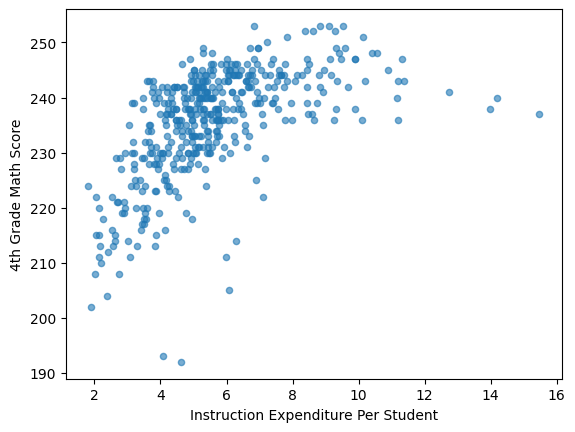

In [68]:
# create scatterplot with average 4th grade math score as the response variable
statesEdu.plot.scatter( y='AVG_MATH_4_SCORE', x='INST_EXPENDITURE_PER_STUD', alpha=0.6)
# add y label
plt.ylabel('4th Grade Math Score')
# ass x label
plt.xlabel('Instruction Expenditure Per Student')

There appears to be a fairly strong, positive linear realtionship between instructional expenditure per student and 4th grade math score. 

**Visualization 2**

Text(0.5, 0, 'Support Services Expenditure Per Student')

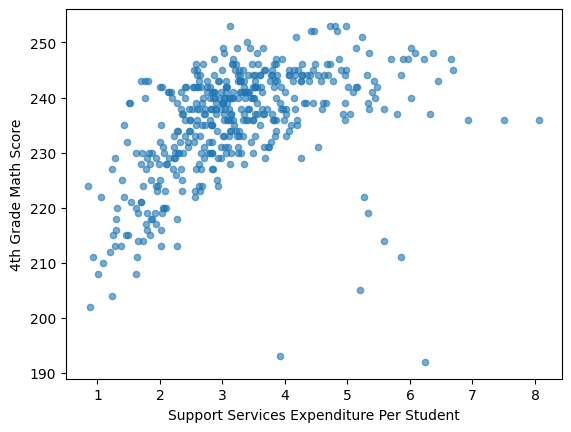

In [67]:
statesEdu.plot.scatter( y='AVG_MATH_4_SCORE', x='SUP_SERVICES_EXPENDITURE_PER_STUD', alpha=0.6)
plt.ylabel('4th Grade Math Score')
plt.xlabel('Support Services Expenditure Per Student')

There appears to be a moderately strong, positive linear realtionship between supportive services expenditure per student and 4th grade math score. Additionally, the observations appear a bit more spread out than the previous feature. 

**Visualization 3**

Text(0.5, 0, 'Capital Outlay Expenditure Per Student')

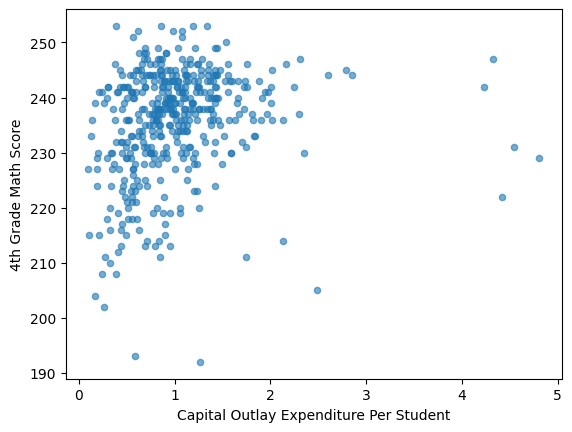

In [66]:
statesEdu.plot.scatter( y='AVG_MATH_4_SCORE', x='CAP_OUTLAY_EXPENDITURE_PER_STUD', alpha=0.6)
plt.ylabel('4th Grade Math Score')
plt.xlabel('Capital Outlay Expenditure Per Student')

There appears to be a moderate positive linear realtionship between capital outlay expenditure per student and 4th grade math score. Additionally, this plot seems to have less outliers than the previous two features and the observations are more clustered. 

**Visualization 4**

Text(0.5, 0, 'Other Expenditure Per Student')

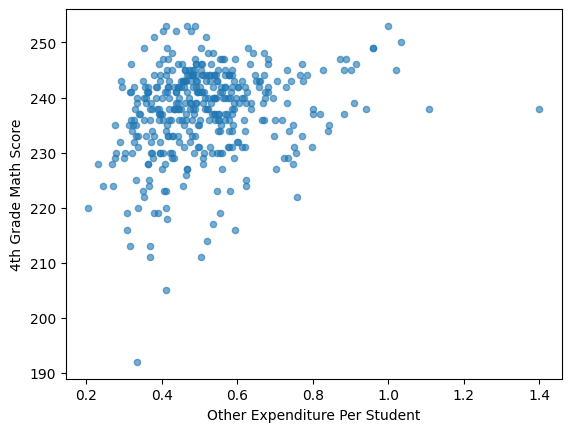

In [65]:
statesEdu.plot.scatter( y='AVG_MATH_4_SCORE', x='OTHER_EXPENDITURE_PER_STUD', alpha=0.6)
plt.ylabel('4th Grade Math Score')
plt.xlabel('Other Expenditure Per Student')

There appears to be a slight positive linear realtionship between other expenditure per student and 4th grade math score. There also appear to be less dramatic outliers.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [74]:
from sklearn.model_selection import train_test_split

In [117]:
X = statesEdu[['INST_EXPENDITURE_PER_STUD', 'CAP_OUTLAY_EXPENDITURE_PER_STUD']].dropna()
y = statesEdu.loc[X.index]['AVG_MATH_4_SCORE']
y.fillna(y.median(), inplace=True)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [102]:
from sklearn.linear_model import LinearRegression

In [119]:
# create your model here
model = LinearRegression()

In [120]:
model.fit(X_train, y_train)

LinearRegression()

In [121]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [126]:
# intecept the model generates
print(model.intercept_)
# coefficiants the model generates
print(model.coef_)
# R^2 value (closer to 1, the better the fit)
model.score(X_test, y_test)
# root mean squared error
np.mean((model.predict(X_test)-y_test)**2)**0.5

220.01779110928197
[2.75770852 0.16580434]


6.574902048906176

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

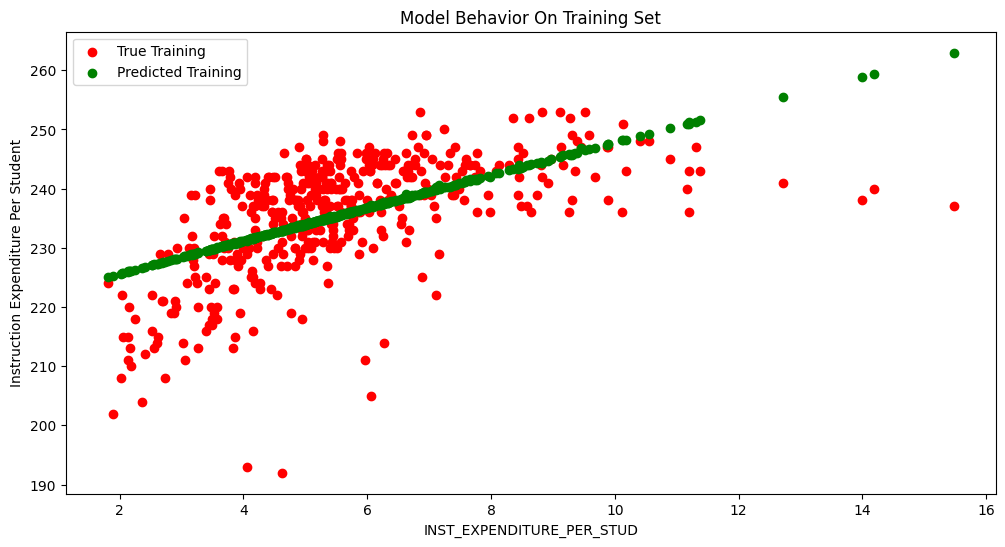

In [123]:
col_name = 'INST_EXPENDITURE_PER_STUD'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Instruction Expenditure Per Student')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

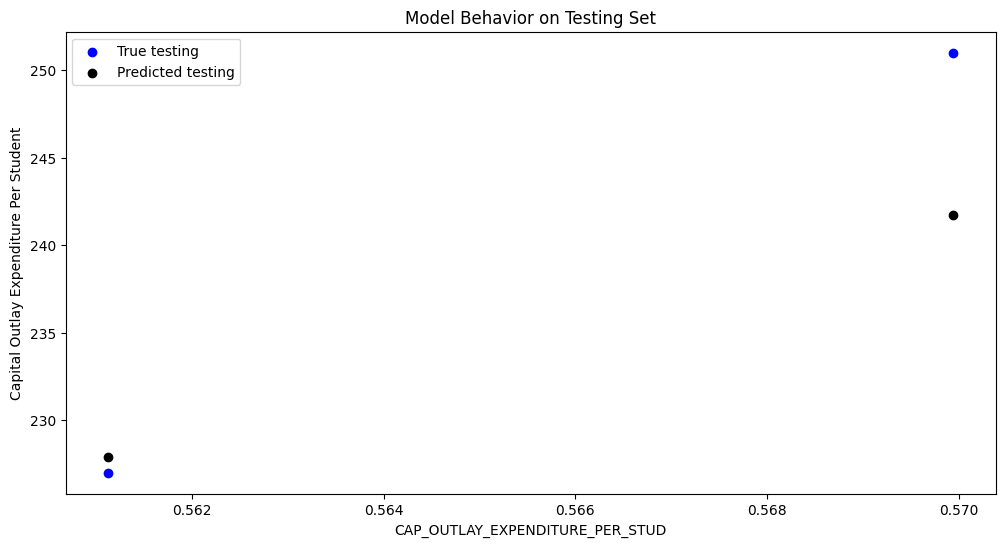

In [124]:
col_name = 'CAP_OUTLAY_EXPENDITURE_PER_STUD'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Capital Outlay Expenditure Per Student')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**